<h1 style="text-align:center">Modeling Educational Data with Machine Learning Methods</h1>

## 1. Let's Import all necessary libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

## 2. Read the dataset

In [2]:
# Load the dataset
df = pd.read_csv('students_data.csv')
df = df.drop('ID', axis=1)

## 3. EDA

#### Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  faKHup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [4]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['school'] = df['school'].map({'HS': 1, 'KH': 0})
df = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'guardian', 'reason'])

In [5]:
# Get summary statistics
df.describe()

,school,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,...,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,reason_course,reason_home,reason_other,reason_reputation
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.739464,0.433908,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,...,0.559387,0.279693,0.062261,0.232759,0.697318,0.069923,0.411877,0.247126,0.103448,0.237548
std,0.439138,0.495850,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,...,0.496699,0.449064,0.241744,0.422792,0.459639,0.255140,0.492409,0.431548,0.304689,0.425785
min,0.000000,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* We have `1044` observations.
* We have some catagorical variables as well.
* The hightest score for `10th` and `11th` is `95`, and for `12th` is `100`

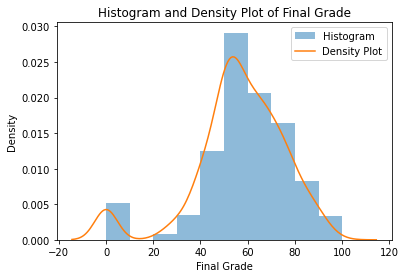

In [6]:
fig, ax = plt.subplots()

# Plot a histogram of the final grade (12th)
plt.hist(df['12th'], alpha=0.5, label='Histogram', density=True)

# Create a density plot of final grade
sns.kdeplot(df['12th'], label='Density Plot')

# Set the title and labels
plt.title('Histogram and Density Plot of Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Display the plot
plt.show()

**As we can see, our output variable (y) has a symmetric shape (Distribution) which is very good for building our model**

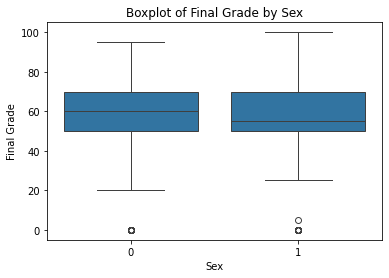

In [7]:
# Plot a boxplot of final grade by sex
sns.boxplot(x='sex', y='12th', data=df)
plt.title('Boxplot of Final Grade by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Grade')
plt.show()

**As we can see, it has good distribution.**
* Male student has some outliers and the median is a lower from female's median, which means female students has better scores the male students.
* There are some outliers in both female and male grade distribution.

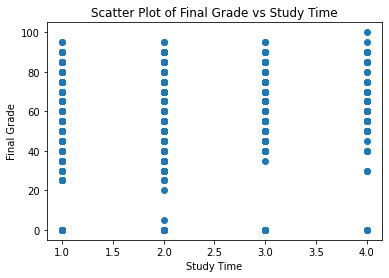

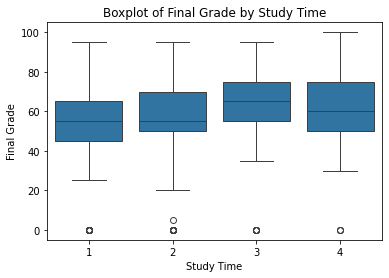

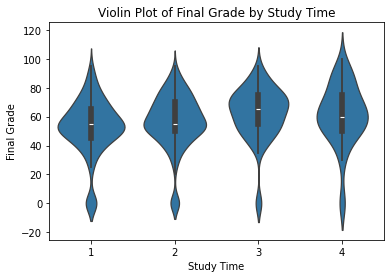

In [8]:
# Plot a scatter plot of final grade vs study time
plt.scatter(df['studytime'], df['12th'])
plt.title('Scatter Plot of Final Grade vs Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

# Create a boxplot of final grade by study time
sns.boxplot(x='studytime', y='12th', data=df)
plt.title('Boxplot of Final Grade by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

# Create a violin plot of final grade by study time
sns.violinplot(x='studytime', y='12th', data=df)
plt.title('Violin Plot of Final Grade by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

**As we know Study Time (weekly study time (numeric: 1 – < 2 hours, 2 – 2 to 5 hours,
3 – 5 to 10 hours or 4 – > 10 hours)
)**

* Those who have studied less than 2 hours, they do not have a scores greater than 60 points.
* Those who have studied more than 5 hours, they are likely to have higher scores.
* As we can see, there are some outliers in the study hours more than 2 and less than 5 hours.
* And also we can observe some outliers in the other parts as well, which is not that much.

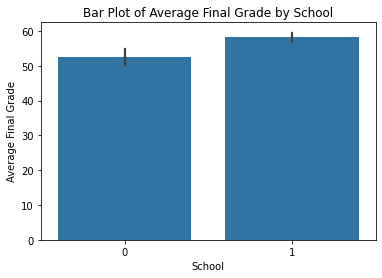

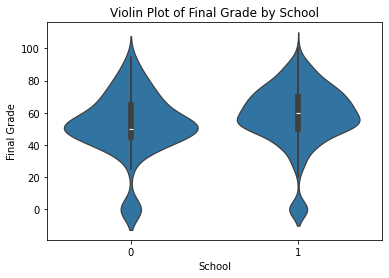

In [9]:
# Create a bar plot of average final grade by school
sns.barplot(x='school', y='12th', data=df)
plt.title('Bar Plot of Average Final Grade by School')
plt.xlabel('School')
plt.ylabel('Average Final Grade')
plt.show()

# Create a violin plot of final grade by school
sns.violinplot(x='school', y='12th', data=df)
plt.title('Violin Plot of Final Grade by School')
plt.xlabel('School')
plt.ylabel('Final Grade')
plt.show()

**As we can see, students who study at HS = Habibia Hight School in Afghanistan have good score than the other school. For your information, Habibia High School is one the best state schools. Thus, we can say, if a school has good repution, then it is likely the students will have good scores.**

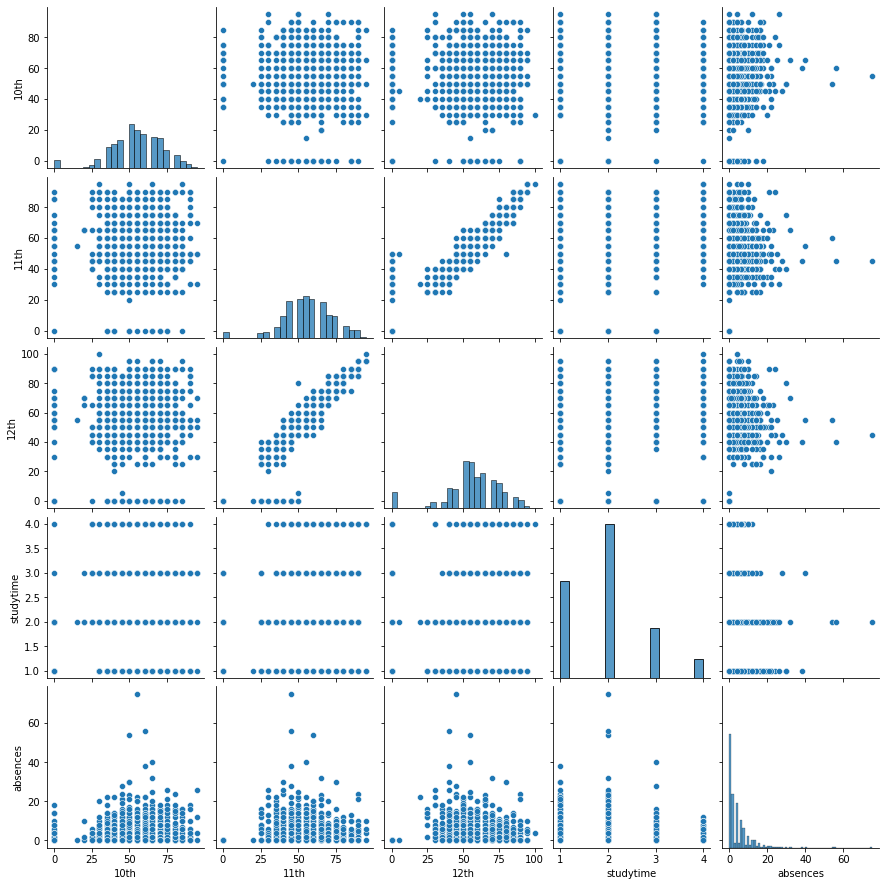

In [10]:
# Create a pair plot of selected variables
sns.pairplot(df[['10th', '11th', '12th', 'studytime', 'absences']])
plt.show()

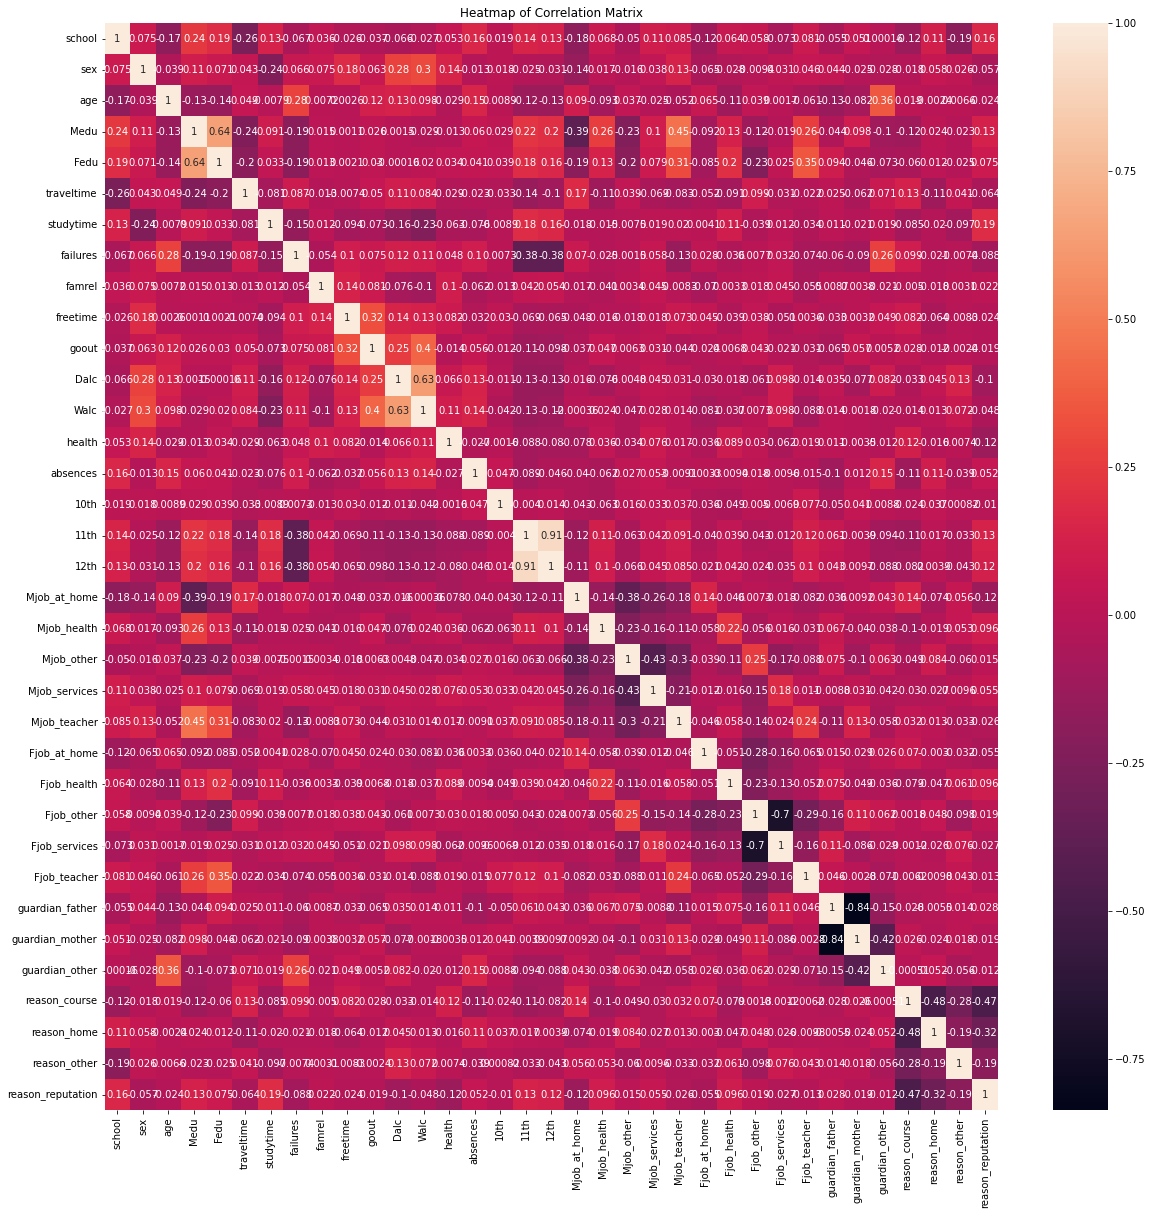

In [11]:
# Calculate the correlation matrix
corr = df.corr()

# Set the figure size
plt.figure(figsize=(25, 20))

# Plot the heatmap with annotations
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

C:\Users\bahra\AppData\Local\Temp\ipykernel_16660\2286698447.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)


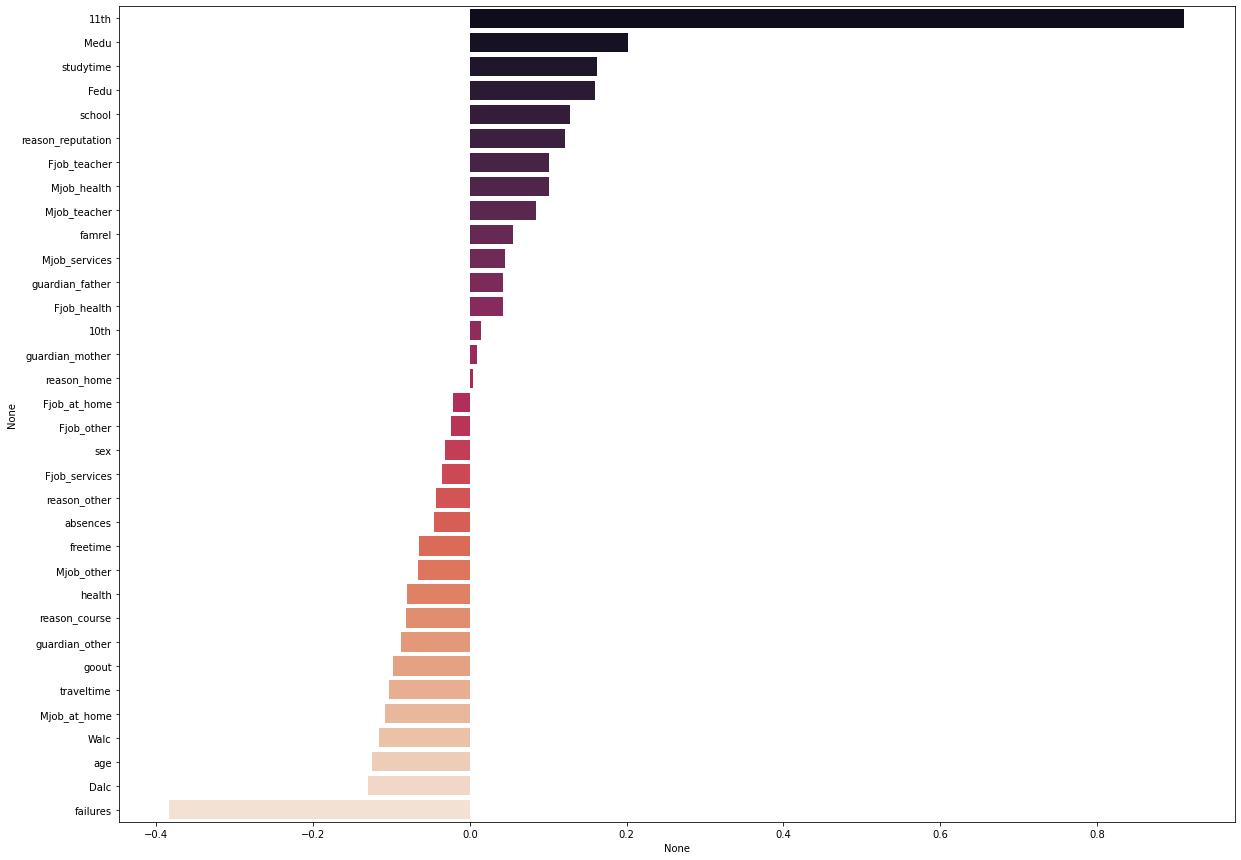

In [15]:
y = df["12th"]
X = df.drop(columns=['12th'])

numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = X[numeric_features].corrwith(y).sort_values(ascending=False)
palette = sns.color_palette("rocket", correlations.size)
plot = sns.barplot(y=correlations.index, x=correlations, palette=palette)
plot.figure.set_size_inches(20, 15)

### Analysis

The most important features are:
* `10th` and `11th` grade scores
* `Father's` and `Mother's` education
* `Study Time`
* `School`
* Family relationships
* gradian
